#### 1)Import Packages

In [374]:
import pypsa
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

#### 2)Create a network and set Snapshots

In [375]:
# Create a new PyPSA network
network = pypsa.Network()
network.set_snapshots(range(1))

In [376]:
type(network)

pypsa.components.Network

#### 3)Add Buses

In [377]:
# Read excel file which contains Non renewable generators data
bus=pd.read_excel('data_exercise2.xlsx',sheet_name='buses',header=0)

In [378]:
bus

,line,bus,v_nom,carrier,x,y
0,1,north_de,380,AC,9.598183,53.558527
1,2,east_de,380,AC,13.607778,51.076934
2,3,west_de,380,AC,6.802514,50.957803


In [379]:
for index, row in bus.iterrows():
    network.add(
        "Bus",
        name=row['bus'],
        v_nom=row['v_nom'],
        carrier=row['carrier'],
        x=row['x'],
        y=row['y']
    )

In [380]:
network.buses

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
north_de,380.0,,9.598183,53.558527,AC,,1.0,0.0,inf,PQ,,
east_de,380.0,,13.607778,51.076934,AC,,1.0,0.0,inf,PQ,,
west_de,380.0,,6.802514,50.957803,AC,,1.0,0.0,inf,PQ,,


#### 4)Add generators

In [381]:
# Read excel file which contains Non renewable generators data
generators=pd.read_excel('data_exercise2.xlsx',sheet_name='generators')

In [382]:
generators

,generator,p_nom,p_nom_max,bus,p_nom_extendable,marginal_cost,lifetime,efficiency,start_up_cost,shut_down_cost,min_up_time,min_down_time,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
0,gen_no1,31,31,north_de,True,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gen_ost1,19,19,east_de,True,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gen_west1,10,30,west_de,True,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.generator),
    p_nom=list(generators.p_nom),
    p_nom_max=list(generators.p_nom_max),  # MW
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
)
network.generators

C:\Users\User\AppData\Local\Temp\ipykernel_11536\1087367996.py:1: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,31.0,0.0,True,0.0,31.0,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,19.0,0.0,True,0.0,19.0,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,10.0,0.0,True,0.0,30.0,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [384]:
network.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,31.0,0.0,True,0.0,31.0,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,19.0,0.0,True,0.0,19.0,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,10.0,0.0,True,0.0,30.0,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


#### 5)Add load

In [385]:
# Read excel file which contains Non renewable generators data
load=pd.read_excel('data_exercise2.xlsx',sheet_name='load',header=0)

In [386]:
load

,bus,load
0,North_de,10
1,east_de,10
2,west_de,40


In [387]:
for index, row in load.iterrows():
    network.add(
        "Load",
        name=row['bus'],
        bus=row['bus'],
        p_set=row['load'],
    )

Index(['North_de'], dtype='object')


In [388]:
network.loads

,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
North_de,North_de,,,10.0,0.0,-1.0,True
east_de,east_de,,,10.0,0.0,-1.0,True
west_de,west_de,,,40.0,0.0,-1.0,True


#### 6)Add Transmission lines

In [389]:
# Read excel file which contains Non renewable generators data
lines=pd.read_excel('data_exercise2.xlsx',sheet_name='lines',header=0)

In [390]:
lines.head()

,line,bus0,bus1,s_nom,r,x,length
0,1,north_de,east_de,14,0.0001,0.0001,400
1,2,east_de,west_de,14,0.0001,0.0001,400
2,3,west_de,north_de,14,0.0001,0.0001,400


In [391]:
# Add line connection between the buses
for index, row in lines.iterrows():
    network.add(
        "Line",
        "{}_{}".format(row['bus0'],row['bus1']),
        bus0=row['bus0'],
        bus1=row['bus1'],
        s_nom=row['s_nom'],
        x=1,
    )

In [392]:
network.lines

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
north_de_east_de,north_de,east_de,,1.0,0.0,0.0,0.0,14.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
east_de_west_de,east_de,west_de,,1.0,0.0,0.0,0.0,14.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
west_de_north_de,west_de,north_de,,1.0,0.0,0.0,0.0,14.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [393]:
network

PyPSA Network
Components:
 - Bus: 3
 - Generator: 3
 - Line: 3
 - Load: 3
Snapshots: 1

#### 7)Solve the network

In [394]:
network.optimize(solver_name="highs")


Index(['North_de'], dtype='object', name='Load')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['gen_no1', 'gen_ost1', 'gen_west1'], dtype='object', name='Generator')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['North_de'], dtype='object', name='Load')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['gen_no1', 'gen_ost1', 'gen_west1'], dtype='object', name='Generator')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
c:\Users\User\anaconda3\Lib\site-packages\linopy\common.py:147: UserWarning:

coords for dimension(s) ['Generator'] is not aligned with the pandas object. Previously, the indexes of the pandas were ignored and overwritten 

('ok', 'optimal')

In [395]:
network.generators_t.p

Generator,gen_no1,gen_ost1,gen_west1
snapshot,,,
0,16.5,19.0,14.5


In [396]:
network.lines_t.p0

Line,north_de_east_de,east_de_west_de,west_de_north_de
snapshot,,,
0,2.5,11.5,-14.0


In [397]:
network.generators_t.p

Generator,gen_no1,gen_ost1,gen_west1
snapshot,,,
0,16.5,19.0,14.5


In [398]:
clearing_price_redisp = network.buses_t.marginal_price.iloc[0].max()
clearing_price_redisp

50.0

In [399]:
network.generators.p_nom_opt

Generator
gen_no1      31.0
gen_ost1     19.0
gen_west1    30.0
Name: p_nom_opt, dtype: float64

<Axes: xlabel='Generator', ylabel='MW'>

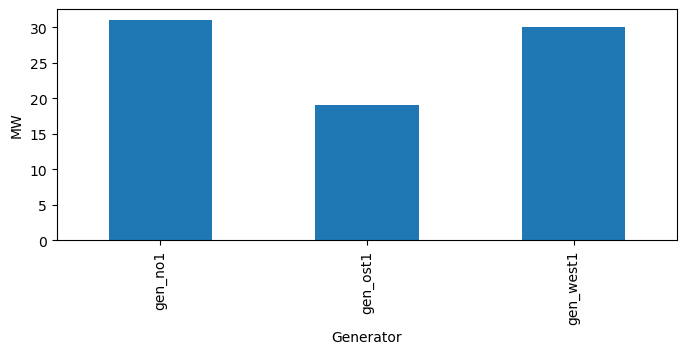

In [400]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

In [401]:
network.lines_t.p0

Line,north_de_east_de,east_de_west_de,west_de_north_de
snapshot,,,
0,2.5,11.5,-14.0


In [402]:
gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

bus       carrier  
east_de   gen_ost1     19.0
north_de  gen_no1      16.5
west_de   gen_west1    14.5
Name: g, dtype: float64

In [403]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name            
Line       north_de_east_de    10
           east_de_west_de     10
           west_de_north_de    10
dtype: int64

In [404]:
plot_graph=network.plot(
    bus_sizes=gen/10,
    bus_colors={"gen_ost1":"midnightblue","gen_ost2": "black","gen_ost3": "yellow", "gen_no1": "gray","gen_no2":"gray","gen_no3":"midnightblue","gen_west1":"cyan","gen_west2":"yellow","gen_west3":"gray"},
    margin=1,
    line_widths=3,
    link_widths=0,
    flow=flow,
    color_geomap=True,
    projection=ccrs.EqualEarth(),
    line_colors=network.lines_t.p0.mean().abs(),
)
plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning:

ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\User\anaconda3\Lib\ast.py:587: DeprecationWarning:

Attribute s is deprecated and will be removed in Python 3.14; use value instead

c:\Users\User\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning:

ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\User\anaconda3\Lib\ast.py:587: DeprecationWarning:

Attribute s is deprecated and will be removed in Python 3.14; use value instead



NameError: name 'ccrs' is not defined

In [ ]:
import cartopy.crs as ccrs
